# 04. PyTorch Custom Datasets Notebook

We've used some datasets with PyTorch before.

But how do you get your own data into PyTorch?

One of the ways to do so is via: custom datasets.

## Domain libraries

Depending on what you're working on, vision, text, audio, recommendation, you'll want to look into each of the PyTorch domain librarires for existing data loading functions and customizable data loading functions.

## 0. Importing PyTorch and setting up device-agnostic code


In [1]:
import torch
from torch import nn

# Note: PyTorch 1.10.0+ is required for this course
torch.__version__

'2.1.2+cpu'

In [2]:
# setup device-agnostic code
device = "cude" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


## 1. Get data

Our dataset is a sbuset of Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).

Why do this?

When starting our ML projects, it's important to try things on a small scale when necessary.

The whole point is to speed up how fast you can experiment.

In [4]:
import requests
import zipfile
from pathlib import Path

#setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists, skipping download")
else:
  print(f"{image_path} directory does not exist, downloading and unzipping")
  image_path.mkdir(parents=True, exist_ok=True)

# download data
  with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak,sushi data...")
    f.write(request.content)

# unzip data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping...")
  zip_ref.extractall(image_path)


data\pizza_steak_sushi directory already exists, skipping download
Unzipping...


In [5]:
image_path

WindowsPath('data/pizza_steak_sushi')

## 2. Becoming one with the data (data preparation and data exploration)

In [6]:
import os
def walk_thorugh_dir(dir_path):
  """ Walks through dir_path returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_thorugh_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [8]:
# Setup training and test data directories (paths)
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2. Visualizing and image

Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's `PIL`
5. We'll then show the image and print the metadata

data\pizza_steak_sushi\train\steak\735441.jpg
steak
Random image path: data\pizza_steak_sushi\train\steak\735441.jpg
Random image class: steak
Random image height: 512
Random image width: 512


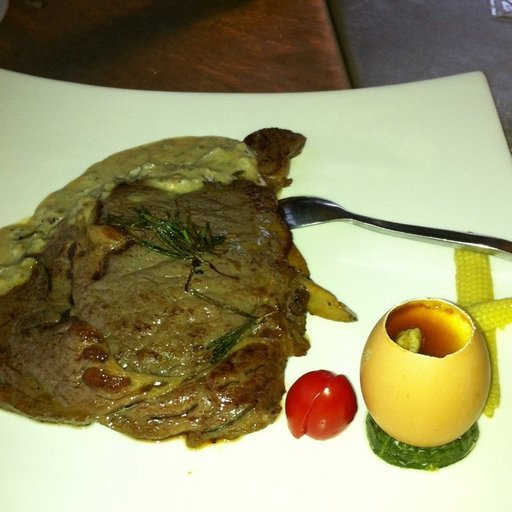

In [9]:
import random
from PIL import Image

# set seed
#random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get the image class from path name (the image class of the directory where the image is)
image_class = random_image_path.parent.stem
print(image_class)

# 4. open the image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Random image class: {image_class}")
print(f"Random image height: {img.height}")
print(f"Random image width: {img.width}")
img

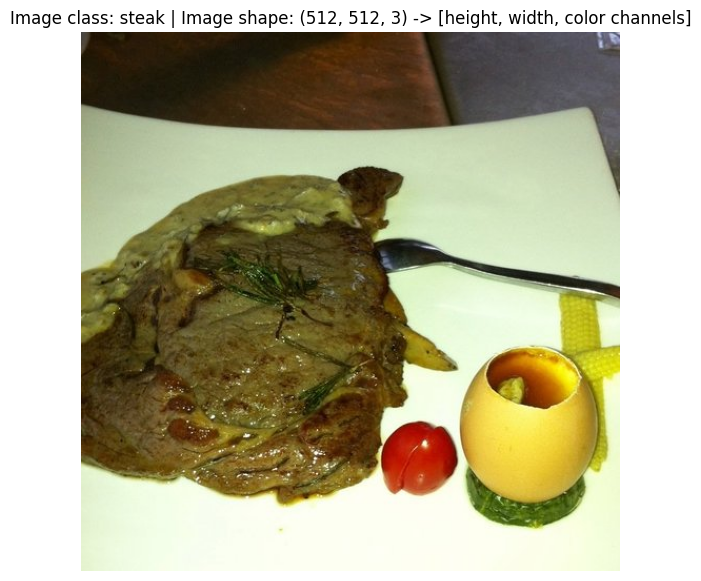

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

# Turn the image into an arrary
img_as_array = np.array(img)

# plot the image with matplot lib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color channels]")
plt.axis(False);

In [11]:
img_as_array

array([[[ 71,  70,  68],
        [ 74,  73,  69],
        [ 77,  73,  70],
        ...,
        [154, 155, 176],
        [174, 172, 193],
        [189, 186, 207]],

       [[ 70,  69,  67],
        [ 73,  72,  68],
        [ 76,  73,  68],
        ...,
        [147, 149, 172],
        [182, 180, 202],
        [203, 199, 222]],

       [[ 72,  68,  65],
        [ 74,  70,  67],
        [ 75,  70,  66],
        ...,
        [ 96, 100, 125],
        [127, 127, 153],
        [158, 155, 182]],

       ...,

       [[229, 243, 207],
        [229, 243, 207],
        [230, 244, 208],
        ...,
        [241, 251, 217],
        [241, 251, 217],
        [240, 250, 216]],

       [[229, 243, 207],
        [229, 243, 207],
        [229, 243, 207],
        ...,
        [241, 251, 217],
        [241, 251, 217],
        [240, 250, 216]],

       [[227, 241, 205],
        [228, 242, 206],
        [228, 242, 206],
        ...,
        [241, 251, 217],
        [241, 251, 217],
        [240, 250, 216]]

## 3. Transforming data

Before we can use our image with PyTorch:
1. Turn your target data into tensors (in our case, numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader`.


In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

In [13]:
# write a transform for image
data_transform = transforms.Compose([
  # Resize our images to 64x64 pixels
  transforms.Resize((64,64)),
  # flip the images randomly on the horizontal axis
  transforms.RandomHorizontalFlip(p=0.5),
  # turn the image into a PyTorch tensor
  transforms.ToTensor()
])

In [14]:
data_transform(img).shape

torch.Size([3, 64, 64])

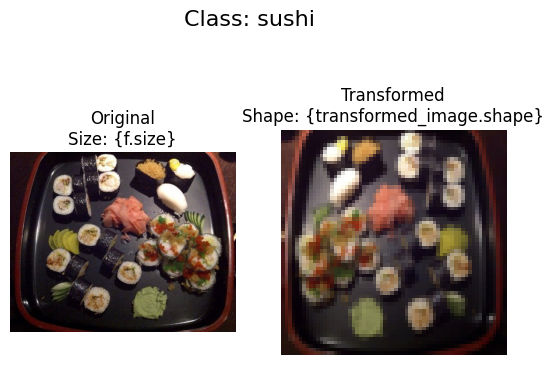

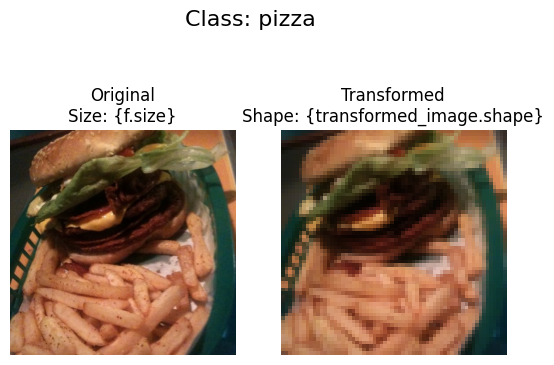

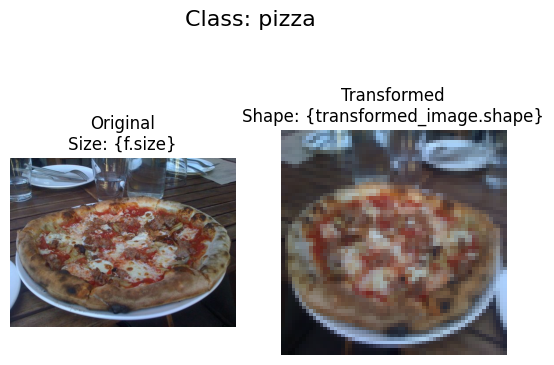

In [15]:
def plot_transformed_images(image_paths, transform, n=3,seed=42):
  """selects random images from a path of images and loads/transforms them then plots the original vs transformed version"""
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols =2)
      ax[0].imshow(f)
      ax[0].set_title("Original\nSize: {f.size}")
      ax[0].axis(False)

      # transform the image and plot it
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title("Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform,
                        n=3, seed=42)


## 4.1 Option 1: Loading image using `ImageFolder`

We can load image classification data using `torchvision.datasets.ImageFolder`

In [16]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the labels/targets

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
# Gets the names as lists
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
# Get the class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
# check the lengths of our data
len(train_data), len(test_data)

(225, 75)

In [20]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [21]:
# Index on the train_data dataset to get a singhle image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"label datatype: {type(label)}")


Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color channels, height, width]
Permuted shape: torch.Size([64, 64, 3]) -> [height, width, color channels]


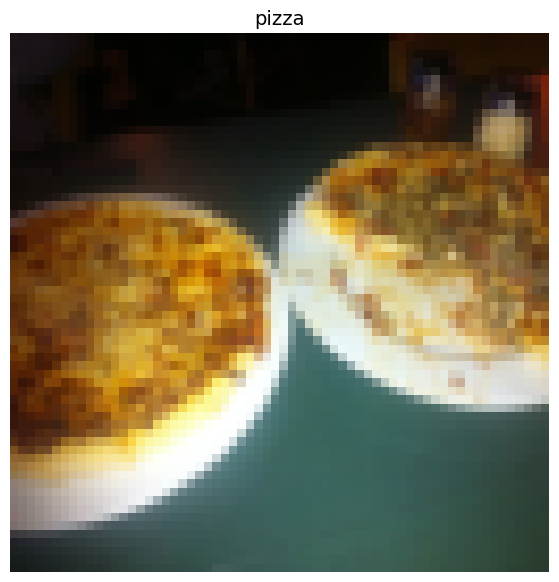

In [22]:
# Rearrange the order dimensions
img_permute = img.permute(1,2,0)

# Print our different shapes
print(f"Original shape: {img.shape} -> [color channels, height, width]")
print(f"Permuted shape: {img_permute.shape} -> [height, width, color channels]")

# Plot the image with permuted dimensions
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14);

### 4.1 Turn loaded images into `DataLoader`'s

A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we can customise the `batch_size` so our model can see `batch_size` images at a time

In [23]:
# Turn train and test datasets into DataLoader(s)
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers=4,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              num_workers=4,
                              shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1f4b6912910>,
 <torch.utils.data.dataloader.DataLoader at 0x1f4b69a2690>)

Our lengths or dataloaders are same as of our datasets because we are using BATCH_SIZE = 1

In [24]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [25]:
img, label = next(iter(train_dataloader))

# BATCH size will now be 1, you can change the BATCH size if you like
print(f"Image shape: {img.shape} -> [batch size, color channels, height, width]")
print(f"Image label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch size, color channels, height, width]
Image label shape: torch.Size([1])


## 5. Option 2: Loading image data with a custom `Dataset`

1. Want to be able to load images from file
2. want to be able to get class names from the Dataset
3. want to be able to get classes as dictionary from the Dataset

Pros:
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch pre-build `Dataset` functions

Cons:
* Even though you could create a `Dataset` out of almost anything, it doesn't mean it will work...
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues.

In [26]:
import os
import pathlib
import torch


from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [27]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 creating a helper function to get class names

We want to function to:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't fround (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them.

In [28]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")


# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [31]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory"""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"couldn't find any classes in {directory}... please check the file structure.")
  
  # 3. Create a dictionary of index labels (computer prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [32]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})